Import Libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import Data

In [132]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EDA

Missing Data
Using seabord to create heatmap to see missing data.

In [133]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

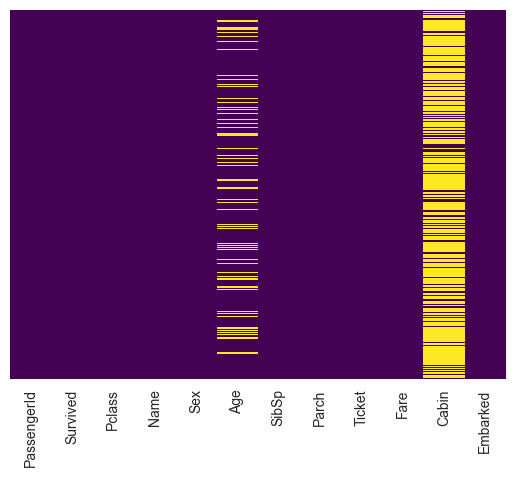

In [134]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap="viridis")


Roughly 20% of the Age is missing. The proportion of age is missing is likely small enough for reasonable with some form of imputation
Looking at the cabin column. looks like we are missing too much data to do somehing useful with at a basic level. we'll probably drop or change it to another form like Cabin known : 1 or 0.

<AxesSubplot: xlabel='Survived', ylabel='count'>

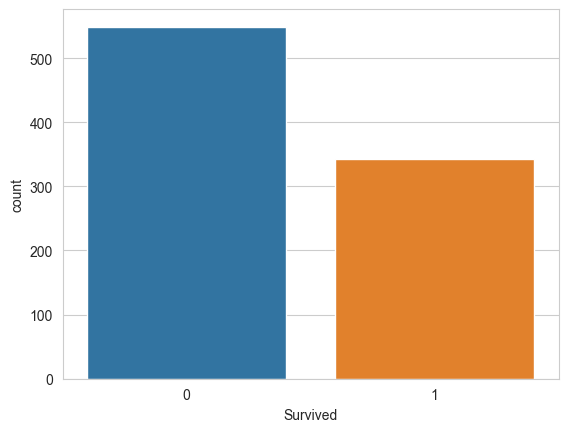

In [135]:
sns.set_style('whitegrid')
sns.countplot(data=train,x="Survived")

<AxesSubplot: xlabel='Survived', ylabel='count'>

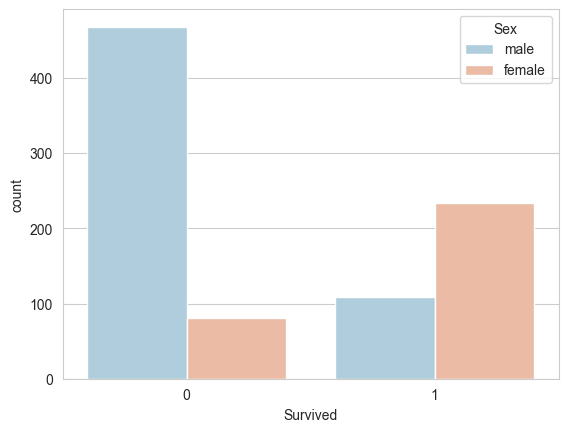

In [136]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=train,palette="RdBu_r")

<AxesSubplot: xlabel='Survived', ylabel='count'>

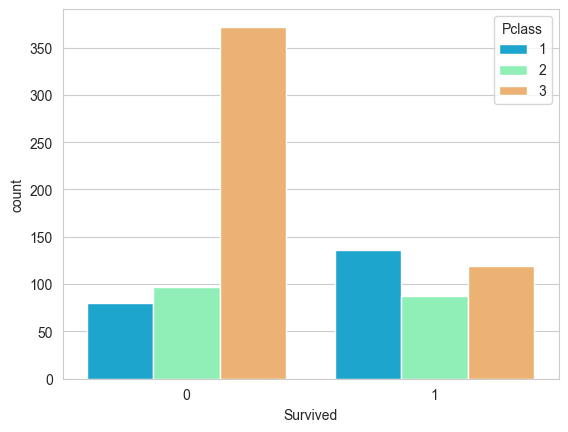

In [137]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue='Pclass',data=train,palette='rainbow')

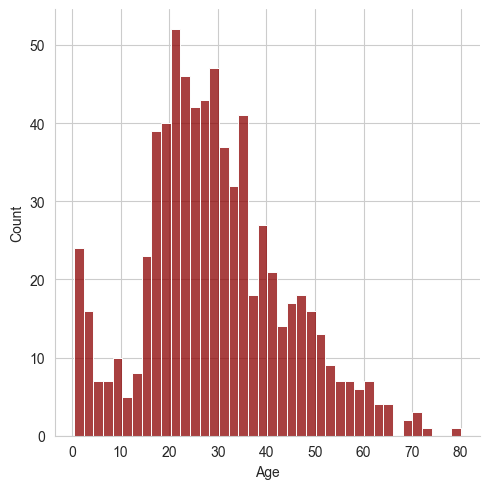

In [138]:
sns.displot(train["Age"].dropna(),kde=False,color="darkred",bins=40)

<AxesSubplot: >

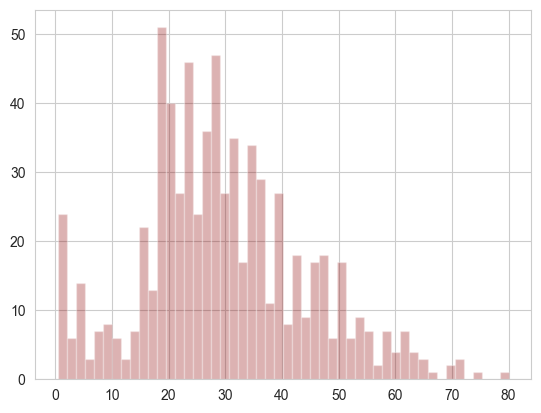

In [139]:
train["Age"].hist(bins=50,color="darkred",alpha=0.3)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

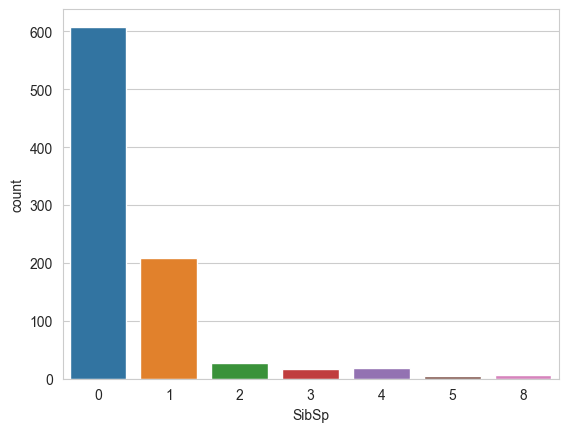

In [140]:
sns.countplot(x="SibSp",data=train)

<AxesSubplot: >

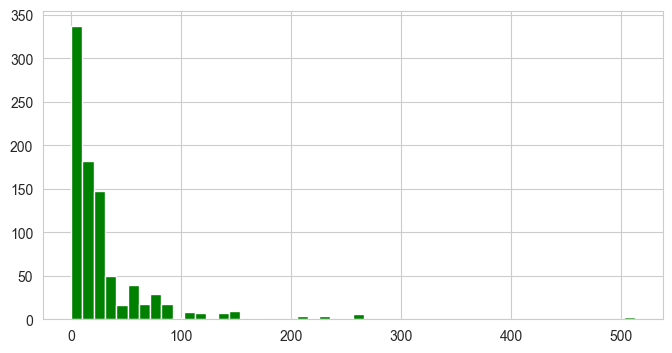

In [141]:
train['Fare'].hist(color="green",bins=50,figsize=(8,4))

Data cleaning 

We want to fill missing 

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

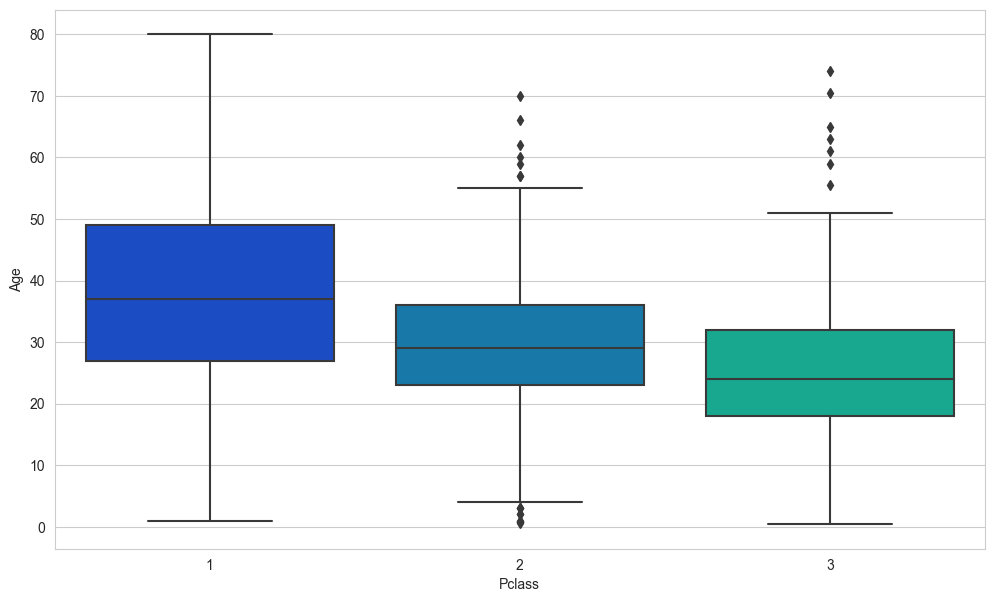

In [142]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=train,palette="winter")

In [143]:
def fill_age(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age   

<AxesSubplot: >

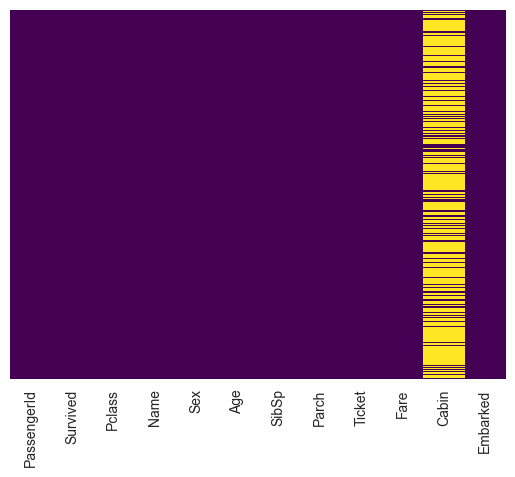

In [144]:
train["Age"] = train[["Age","Pclass"]].apply(fill_age,axis=1)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")


In [145]:
train.drop('Cabin',axis=1,inplace=True)
train.head()
train.dropna(inplace=True)

Converting Categorical Features

In [146]:
pd.get_dummies(train["Embarked"],drop_first=True).head()
sex = pd.get_dummies(train["Sex"],drop_first=True)
embark = pd.get_dummies(train["Embarked"],drop_first=True)
train.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)
train.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [147]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Building a Logistic Regression Model 

Train Test Split